In [41]:
import os
import json
from glob import glob
import re

import numpy as np
import pandas as pd

In [84]:
# read the json
basepath = '/Users/ic0523/Documents/projects/misc/vlm-binding'
json_paths = sorted(glob(os.path.join(basepath, 'data', 'clevr', 'scenes', '*.json')))
img_paths = sorted(glob(os.path.join(basepath, 'data', 'clevr', 'images', '*.png')))
img_ids = [re.split(r'_|\.', path)[2] for path in img_paths]
json_paths = [path for path in json_paths if re.split(r'_|\.', path)[2] in img_ids] # filter out json files that do not have corresponding images

# Load in the task relevant metadata for the CLEVR dataset
results = pd.DataFrame(np.zeros((len(json_paths), 5)), columns=['path', 'n_objects', 'properties', 'response', 'answer'], dtype=object)
for i, json_path in enumerate(json_paths):
    with open(json_path, 'r') as f:
        scene = json.load(f)
        results.loc[i, 'path'] = os.path.join('data', 'clevr', 'images', scene['image_filename'])
        results.loc[i, 'n_objects'] = len(scene['objects'])
        results.loc[i, 'properties'] = [{'shape': object['shape'], 'color': object['color']} for object in scene['objects']]

In [85]:
test = results[results['n_objects'] == 6].sample(20)
test.to_csv(os.path.join(basepath, 'output', 'counting_results.csv'), index=False)

In [86]:
test = pd.read_csv(os.path.join(basepath, 'output', 'counting_results.csv'))
(test.answer == test.n_objects).mean()                  

0.8

In [212]:
len(1)

TypeError: object of type 'int' has no len()

0.27930986863260276

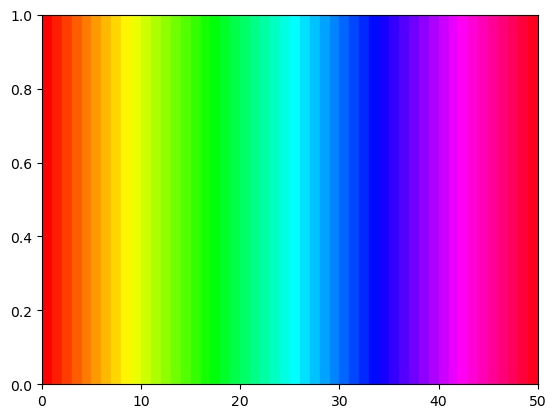

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def generate_isoluminant_colors(num_colors, saturation=1.0, lightness=1.0, mu=0.5, sigma=0.1, uniform=False):
    if uniform:
        hues = np.linspace(0, 1, num_colors, endpoint=False)
    else:
        hues = np.random.normal(loc=mu, scale=sigma, size=num_colors) % 1.0
    hsl_colors = [(hue, saturation, lightness) for hue in hues]
    rgb_colors = [mcolors.hsv_to_rgb(color) for color in hsl_colors]
    return rgb_colors

num_colors = 50
colors = generate_isoluminant_colors(num_colors, uniform=True)

fig, ax = plt.subplots()
for i, color in enumerate(colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, num_colors)
ax.set_ylim(0, 1)
plt.show()

In [105]:
alphas.sum()

0.9999999999999994

In [209]:
import numpy as np
import matplotlib.pyplot as plt

n_shapes = 20
n_samples = 10
w = 5
alphas = np.random.dirichlet([w/n_shapes]*n_shapes, size=1)[0] 
test = np.random.choice(np.arange(n_shapes), size=n_samples, p=alphas)
test

array([ 0,  7, 10, 10, 18, 18, 10, 18, 18,  8])

In [169]:
n_shapes

0.005